In [38]:
import librosa
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import deque
import os

In [39]:
# 데이터 종류를 알기 위해 디렉토리 리스트 가져오기
path = './train'
folder_list = os.listdir(path)
print("lsit = {}".format(folder_list))

lsit = ['bed', 'bird', 'cat', 'dog', 'down', 'eight', 'five', 'four', 'go', 'happy', 'house', 'left', 'marvin', 'nine', 'no', 'off', 'on', 'one', 'right', 'seven', 'sheila', 'six', 'stop', 'three', 'tree', 'two', 'up', 'wow', 'yes', 'zero']


In [40]:
fname = []
ylist = []
srlist = []
fsize = []
duration = []
for folder in folder_list:
    fpath = librosa.util.find_files(path+'/'+folder) #폴더 내 음원파일경로 반환
    fsize.append(os.path.getsize(fpath[0]))
    y, sr = librosa.load(fpath[0]) # 각 폴더의 첫번째 음원파일읽기
    duration.append(librosa.core.get_duration(y=y,sr=sr,filename=fpath[0]))
    fname.append(fpath[0].split('\\')[-1])
    ylist.append(y)
    srlist.append(sr)

In [41]:
pd.DataFrame({"folder name" : folder_list, "file name" : fname, "file size(byte)" : fsize, "duration(sec)" : duration, "waveform" : ylist, "sampling rate" : srlist})

,folder name,file name,file size(byte),duration(sec),waveform,sampling rate
0,bed,00176480_nohash_0.wav,32044,1.000000,"[8.541816e-05, 4.4010783e-05, 7.352678e-05, 0....",22050
1,bird,00b01445_nohash_0.wav,32044,1.000000,"[-0.0072539067, 0.030545454, 0.053619757, 0.00...",22050
2,cat,004ae714_nohash_0.wav,32044,1.000000,"[-0.003083938, -0.003627289, -0.0020763648, -0...",22050
3,dog,00b01445_nohash_0.wav,32044,1.000000,"[0.00053908955, -0.00068050774, -0.00037010782...",22050
4,down,00176480_nohash_0.wav,32044,1.000000,"[-0.00014653604, -0.00014879297, -0.0001030994...",22050
5,eight,004ae714_nohash_0.wav,32044,1.000000,"[-0.0033878097, -0.0031528366, -0.0030895122, ...",22050
6,five,004ae714_nohash_0.wav,32044,1.000000,"[0.0005505977, 0.0008671834, 0.00069578807, 0....",22050
7,four,004ae714_nohash_0.wav,31252,0.975250,"[-0.00014615343, -0.00026290258, -0.0009856733...",22050
8,go,004ae714_nohash_0.wav,22336,0.696625,"[-0.002383716, -0.0037664683, -0.0035470822, -...",22050
9,happy,012c8314_nohash_0.wav,32044,1.000000,"[0.0024132126, 0.00292246, 0.0022912382, 0.002...",22050


In [101]:
import wave

In [116]:
wav = wave.open(path+'/'+folder_list[0]+'/'+fname[0], mode='rb')

In [117]:
signal = wav.readframes(-1) # 최대 n 프레임의 오디오를 bytes 객체로 읽고 반환합니다.
signal = np.fromstring(signal, 'Int16')

C:\Users\yangang\Anaconda3\envs\dafit\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: Numeric-style type codes are deprecated and will result in an error in the future.
  
C:\Users\yangang\Anaconda3\envs\dafit\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  


[ 3  1  6 ... -1 -3  4]
(16000,)


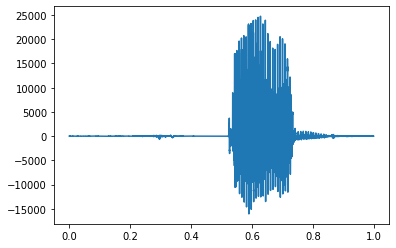

In [118]:
fs = wav.getframerate()
Time=np.linspace(0, len(signal)/fs, num=len(signal))
print(signal)
print(signal.shape)
plt.plot(Time,signal)